# Starting from Video #50 Tensorflow yt video



## A NN Regression Problem with Insurance

In [2]:
 # Import required libraries
 import tensorflow as tf
 import pandas as pd 
 import numpy as np
 import matplotlib.pyplot as plt

In [3]:
# Read in the insurance dataset (link to raw data already been copied to clipboard)
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance # noice

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


 Recode categorical variables into numbers (suitable for NN inputs)

 we will use one-hot encoding

  - turns each category into a column populated by 1's or 0's


In [4]:
# us get_dummies
insurance_onehot = pd.get_dummies(insurance) #very EZ
insurance_onehot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [5]:
# separate df into features and labels
y = insurance_onehot['charges']
X = insurance_onehot.drop('charges', axis = 1)

In [6]:
#view X & y
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [7]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)
print(len(X), len(X_train), len(X_test))


1338 1070 268


In [8]:
# Build a NN
tf.random.set_seed(22)
insurance_model = tf.keras.Sequential([
                  tf.keras.layers.Dense(12),
                  tf.keras.layers.Dense(1)
])
insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ['mae'])
insurance_model.fit(X_train, y_train, epochs = 500)

Epoch 1/500
34/34 [==============================] - 1s 1ms/step - loss: 8468.5420 - mae: 8468.5420
Epoch 2/500
34/34 [==============================] - 0s 1ms/step - loss: 7600.2944 - mae: 7600.2944
Epoch 3/500
34/34 [==============================] - 0s 2ms/step - loss: 7543.1890 - mae: 7543.1890
Epoch 4/500
34/34 [==============================] - 0s 1ms/step - loss: 7680.3833 - mae: 7680.3833
Epoch 5/500
34/34 [==============================] - 0s 1ms/step - loss: 7569.3970 - mae: 7569.3970
Epoch 6/500
34/34 [==============================] - 0s 1ms/step - loss: 7844.6533 - mae: 7844.6533
Epoch 7/500
34/34 [==============================] - 0s 1ms/step - loss: 7493.2451 - mae: 7493.2451
Epoch 8/500
34/34 [==============================] - 0s 1ms/step - loss: 7480.1157 - mae: 7480.1157
Epoch 9/500
34/34 [==============================] - 0s 1ms/step - loss: 7584.6064 - mae: 7584.6064
Epoch 10/500
34/34 [==============================] - 0s 1ms/step - loss: 7618.0757 - mae: 7618.0757

In [9]:
# Evaluate the insurance model
insurance_model.evaluate(X_test, y_test) #model is off by around 6,000 on average (not very good)
y_train.mean(), y_train.median()

9/9 [==============================] - 0s 2ms/step - loss: 6316.4180 - mae: 6316.4180


(13346.089736364489, 9575.4421)

Right now our model isn't performing great. Lets try to improve it

In [10]:
insurance_model2 = tf.keras.Sequential([
                  tf.keras.layers.Dense(20),
                  tf.keras.layers.Dense(1)
])
insurance_model2.compile(loss = tf.keras.losses.mae,
                         optimizer = tf.keras.optimizers.Adam(learning_rate=.0022),
                         metrics = ['mae'])
insurance_model2.fit(X_train, y_train, epochs = 100)


Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 13311.1611 - mae: 13311.1611
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 13255.5947 - mae: 13255.5947
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13182.5947 - mae: 13182.5947
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 13082.3623 - mae: 13082.3623
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 12948.4043 - mae: 12948.4043
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 12776.7744 - mae: 12776.7744
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 12563.9727 - mae: 12563.9727
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12306.2451 - mae: 12306.2451
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 12000.1387 - mae: 12000.1387
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 11650.15

In [11]:
insurance_model2.evaluate(X_test, y_test) #a lil better

9/9 [==============================] - 0s 2ms/step - loss: 6756.3535 - mae: 6756.3535


[6756.353515625, 6756.353515625]

One More Experiment for fun

In [12]:
insurance_model3 = tf.keras.Sequential([
               tf.keras.layers.Dense(100),
               tf.keras.layers.Dense(10),
               tf.keras.layers.Dense(1)                        
])

insurance_model3.compile(loss = tf.keras.losses.mae,
                         optimizer = tf.keras.optimizers.Adam(learning_rate=.0022),
                         metrics = ['mae'])
history = insurance_model3.fit(X_train, y_train, epochs = 150) #clear that 500 is unneccesary

Epoch 1/150
34/34 [==============================] - 0s 2ms/step - loss: 13210.7500 - mae: 13210.7500
Epoch 2/150
34/34 [==============================] - 0s 2ms/step - loss: 12520.7285 - mae: 12520.7285
Epoch 3/150
34/34 [==============================] - 0s 2ms/step - loss: 10457.1572 - mae: 10457.1572
Epoch 4/150
34/34 [==============================] - 0s 2ms/step - loss: 7857.7578 - mae: 7857.7578
Epoch 5/150
34/34 [==============================] - 0s 2ms/step - loss: 7434.1147 - mae: 7434.1147
Epoch 6/150
34/34 [==============================] - 0s 2ms/step - loss: 7365.2246 - mae: 7365.2246
Epoch 7/150
34/34 [==============================] - 0s 2ms/step - loss: 7325.7773 - mae: 7325.7773
Epoch 8/150
34/34 [==============================] - 0s 2ms/step - loss: 7290.2231 - mae: 7290.2231
Epoch 9/150
34/34 [==============================] - 0s 2ms/step - loss: 7235.5161 - mae: 7235.5161
Epoch 10/150
34/34 [==============================] - 0s 2ms/step - loss: 7190.6406 - mae: 719

In [13]:
insurance_model3.evaluate(X_test, y_test) # a lil better still


9/9 [==============================] - 0s 2ms/step - loss: 3273.3005 - mae: 3273.3005


[3273.300537109375, 3273.300537109375]

Text(0.5, 0, 'epochs')

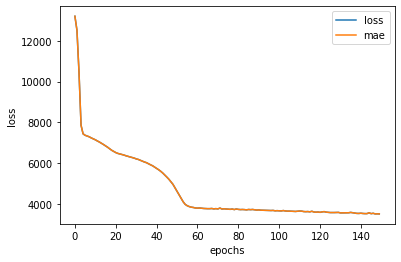

In [14]:
# plot history i.e. a loss curve or training curve
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

How long you train for always depends on the problem. However, tensorflow has a feature called early stopping callback which is a tf component that stops training when the loss stops decreasing. (basically an algorithm that maxes out the # of epochs)

## Preprocessing Data: Normalization and Standardization

In [15]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


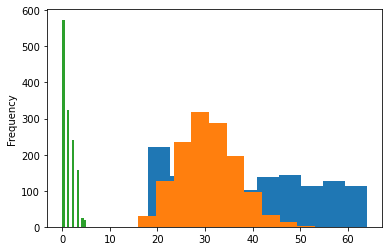

In [16]:
X['age'].plot(kind = 'hist')
X['bmi'].plot(kind = 'hist')
X['children'].plot(kind = 'hist')
#different ranges

### Feature Scaling

- converts data such that their ranges are the sample_data
- preserves distribution
- can be useful for NN's + more
- metrics converge faster when training data is on similar scales

In [37]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# create column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']),
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
    )
# create x and y
X = insurance.drop('charges', axis = 1)
y = insurance['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ct.fit(X_train)
# transform training and testing data with the transformer
X_train_norm = ct.transform(X_train)
X_test_norm = ct.transform(X_test)

(array([ 22., 108., 186., 258., 229., 155.,  76.,  25.,   9.,   2.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

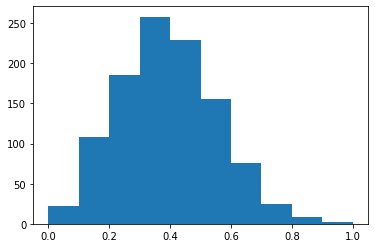

In [31]:
#  what does our data look like now?
plt.figure(0)
plt.hist(X_train_norm[:,1])



In [33]:
X_train_norm.shape, X_train.shape # more cols bc of one hot encoding

((1070, 11), (1070, 6))

In [39]:
# Build the model with normalized data - first go
insurance_model_norm = tf.keras.Sequential([
                   tf.keras.layers.Dense(100),
                   tf.keras.layers.Dense(10),
                   tf.keras.layers.Dense(1)                         
])

insurance_model_norm.compile(loss = tf.keras.losses.mae,
                             optimizer = tf.keras.optimizers.Adam(learning_rate=.0022), 
                             metrics = ['mae'])
insurance_model_norm.fit(X_train_norm, y_train, epochs = 150)

Epoch 1/150
34/34 [==============================] - 0s 2ms/step - loss: 13340.2197 - mae: 13340.2197
Epoch 2/150
34/34 [==============================] - 0s 1ms/step - loss: 13300.5342 - mae: 13300.5342
Epoch 3/150
34/34 [==============================] - 0s 1ms/step - loss: 13159.1787 - mae: 13159.1787
Epoch 4/150
34/34 [==============================] - 0s 2ms/step - loss: 12815.2227 - mae: 12815.2227
Epoch 5/150
34/34 [==============================] - 0s 2ms/step - loss: 12154.3740 - mae: 12154.3740
Epoch 6/150
34/34 [==============================] - 0s 1ms/step - loss: 11141.6699 - mae: 11141.6699
Epoch 7/150
34/34 [==============================] - 0s 2ms/step - loss: 9999.1475 - mae: 9999.1475
Epoch 8/150
34/34 [==============================] - 0s 2ms/step - loss: 8984.7666 - mae: 8984.7666
Epoch 9/150
34/34 [==============================] - 0s 2ms/step - loss: 8307.3418 - mae: 8307.3418
Epoch 10/150
34/34 [==============================] - 0s 2ms/step - loss: 7986.7456 - ma

In [41]:
insurance_model_norm.evaluate(X_test_norm, y_test) # a lil better still

9/9 [==============================] - 0s 2ms/step - loss: 3161.3047 - mae: 3161.3047


[3161.3046875, 3161.3046875]

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               1200      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________
